In [2]:
%load_ext autoreload
%autoreload 2
import rubfx as rfx
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


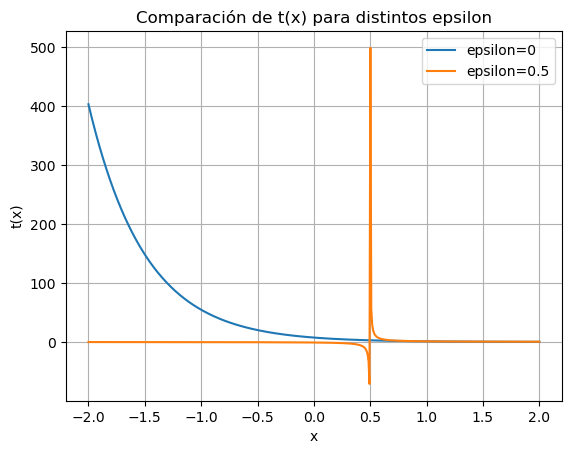

In [3]:
#Rango de x
x = np.linspace(-2, 2, 500)

#Calculo de funciones
t0 = rfx.t(x, epsilon=0, sigma=0.5, mu=1)
t1 = rfx.t(x, epsilon=1, sigma=0.5, mu=1)

#Grafico
plt.plot(x, t0, label='epsilon=0')
plt.plot(x, t1, label='epsilon=0.5')
plt.xlabel('x')
plt.ylabel('t(x)')
plt.legend()
plt.title('Comparación de t(x) para distintos epsilon')
plt.grid(True)
plt.show()

/home/rubsanmon/Escritorio/facultad/4to/2c/astrometria1/2025-unc-famaf-astro-astrometria1/tp2/rubfx.py:20: RuntimeWarning: divide by zero encountered in power
  return (1+epsilon*((x-mu)/sigma))**(-1/epsilon)
/home/rubsanmon/Escritorio/facultad/4to/2c/astrometria1/2025-unc-famaf-astro-astrometria1/tp2/rubfx.py:39: RuntimeWarning: invalid value encountered in multiply
  return (1/sigma) * (t_ep**(epsilon + 1)) * (np.exp(-t_ep))


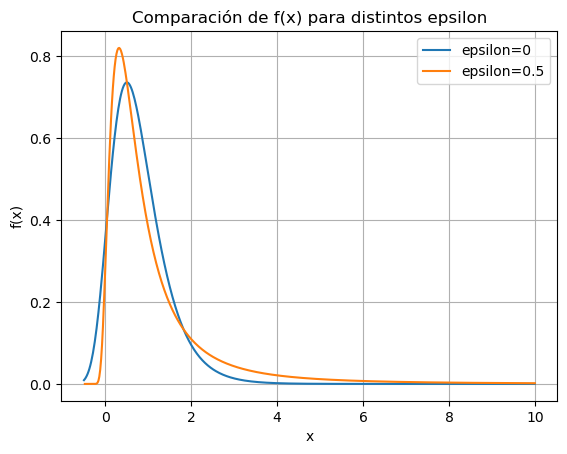

In [4]:
x = np.linspace(-0.5, 10, 500)

f0 = rfx.f(x, epsilon=0, sigma=0.5, mu=0.5)
f1 = rfx.f(x, epsilon=0.5, sigma=0.5, mu=0.5)

plt.plot(x, f0, label='epsilon=0')
plt.plot(x, f1, label='epsilon=0.5')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Comparación de f(x) para distintos epsilon')
plt.grid(True)
plt.show()

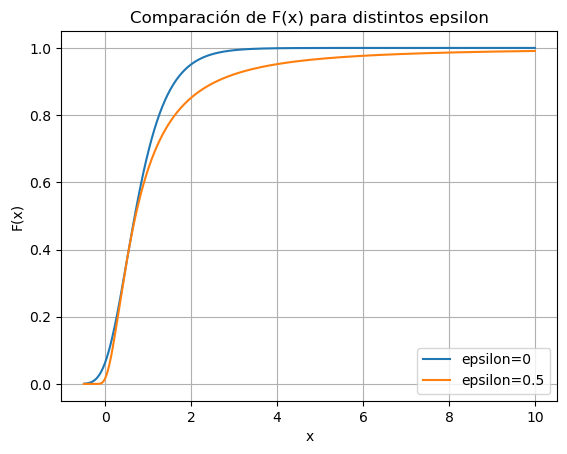

In [5]:
x = np.linspace(-0.5, 10, 500)

F0 = rfx.F(x, epsilon=0, sigma=0.5, mu=0.5)
F1 = rfx.F(x, epsilon=0.5, sigma=0.5, mu=0.5)

plt.plot(x, F0, label='epsilon=0')
plt.plot(x, F1, label='epsilon=0.5')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.title('Comparación de F(x) para distintos epsilon')
plt.grid(True)
plt.show()

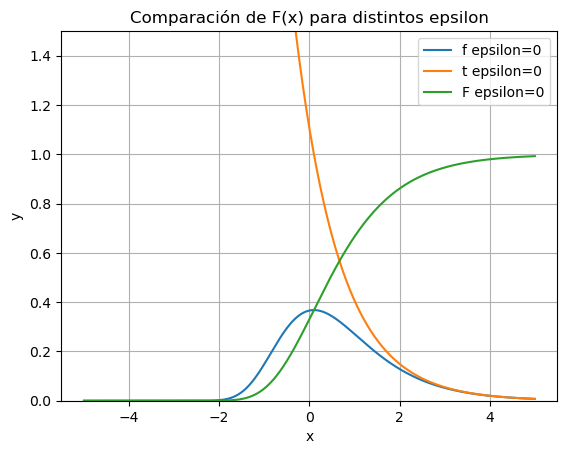

In [6]:
# EPSILON = 0

x = np.linspace(-5, 5, 500)

t0 = rfx.t(x, epsilon=0, sigma=1, mu=0.1)
f0 = rfx.f(x, epsilon=0, sigma=1, mu=0.1)
F0 = rfx.F(x, epsilon=0, sigma=1, mu=0.1)

plt.plot(x, f0, label='f epsilon=0')
plt.plot(x, t0, label='t epsilon=0')
plt.plot(x, F0, label='F epsilon=0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparación de F(x) para distintos epsilon')
plt.grid(True)
plt.ylim(0, 1.5)
plt.show()

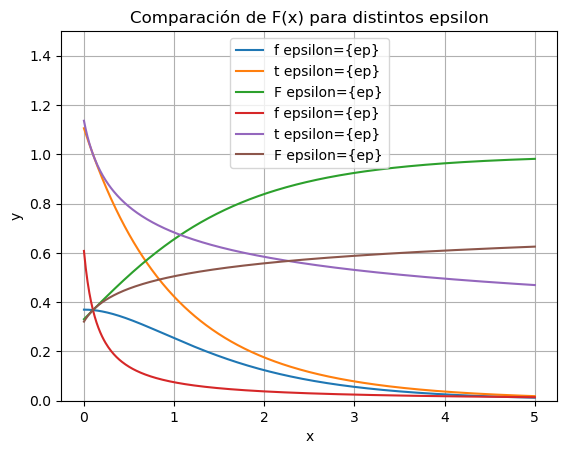

In [7]:
x = np.linspace(0, 5, 500)

ep1 = 0.1
ep2 = 4

t1 = rfx.t(x, epsilon=ep1, sigma=1, mu=0.1)
f1 = rfx.f(x, epsilon=ep1, sigma=1, mu=0.1)
F1 = rfx.F(x, epsilon=ep1, sigma=1, mu=0.1)

t2 = rfx.t(x, epsilon=ep2, sigma=1, mu=0.1)
f2 = rfx.f(x, epsilon=ep2, sigma=1, mu=0.1)
F2 = rfx.F(x, epsilon=ep2, sigma=1, mu=0.1)


plt.plot(x, f1, label='f epsilon={ep}')
plt.plot(x, t1, label='t epsilon={ep}')
plt.plot(x, F1, label='F epsilon={ep}')

plt.plot(x, f2, label='f epsilon={ep}')
plt.plot(x, t2, label='t epsilon={ep}')
plt.plot(x, F2, label='F epsilon={ep}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparación de F(x) para distintos epsilon')
plt.grid(True)
plt.ylim(0, 1.5)
plt.show()

In [9]:
# Busco generar números aleatorios con distribución f(x)
# Para esto uso las funciones generadas en el script rubfx.py

def genum(func, n, epsilon, sigma, mu):
    """
    Genera n números aleatorios distribuidos según la función de distribución acumulada F(x).

    Parámetros:
    func : función
        Función de distribución acumulada F(x).
    n : int
        Cantidad de números aleatorios a generar.
    epsilon : float
        Parámetro epsilon de la función F(x).
    sigma : float
        Parámetro sigma de la función F(x).
    mu : float
        Parámetro mu de la función F(x).

    Retorna:
    numpy.ndarray
        Array de n números aleatorios distribuidos según F(x).
    """
    # Genero n números aleatorios uniformemente distribuidos entre 0 y 1
    x = np.random.uniform(0, 1, n)
    x = np.clip(x, 1e-10, 1-1e-10)

    # Aplico la función inversa para obtener los números con la distribución deseada
    y = np.zeros(n)
    for i, _x in enumerate(x):
        y[i] = rfx.invF(_x, epsilon, sigma, mu)
    return y


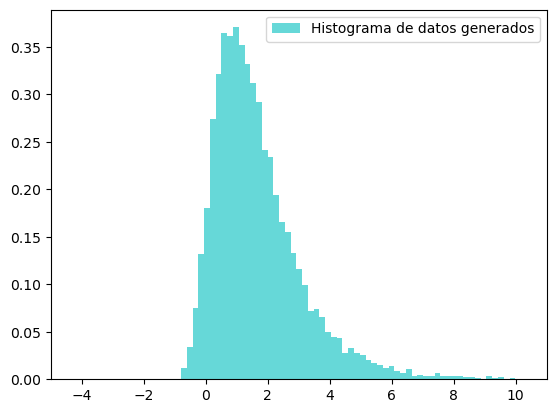

In [53]:
# Grafico los números generados

n = 10000
epsilon = 0.1
sigma = 1
mu = 1
x_uniform = np.random.uniform(0, 1, n)
# Evitar exactamente 0 o 1
x_uniform = np.clip(x_uniform, 1e-10, 1-1e-10)
data = np.array([rfx.invF(_x, epsilon, sigma, mu) for _x in x_uniform])
plt.hist(data, bins = 100, density=True, alpha=0.6, color='c', label='Histograma de datos generados')
plt.xlim(-5, 11)
plt.ylim()  # Si quieres limitar el eje y
plt.legend()
plt.show()



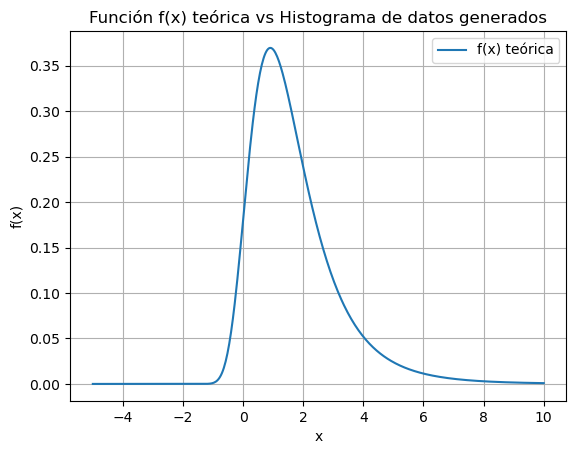

In [54]:
# Ahora quiero ver la funcion f(x) para comparar con el histograma
x = np.linspace(-5, 10, 500)
f0 = rfx.f(x, epsilon=epsilon, sigma=sigma, mu=mu)
plt.plot(x, f0, label='f(x) teórica')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Función f(x) teórica vs Histograma de datos generados')
plt.grid(True)
plt.ylim()  # Si quieres limitar el eje y
plt.show()  

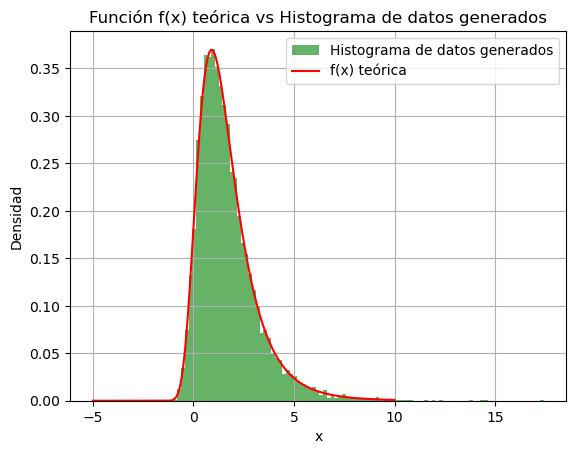

In [55]:
# AHora quiero superoponer la funcion al histograma
plt.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Histograma de datos generados')
plt.plot(x, f0, label='f(x) teórica', color='r')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.title('Función f(x) teórica vs Histograma de datos generados')
plt.grid(True)
plt.ylim()  # Si quieres limitar el eje y
plt.show()